In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


In [2]:
df = pd.read_csv("wisc_bc_data.csv")

In [3]:
print(df.describe().T)  #Values need to be normalized before fitting. 
print(df.isnull().sum())

                   count          mean           std          min  \
id                 569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean        569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean       569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean     569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean          569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean    569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean   569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean     569.0  8.879932e-02  7.971981e-02     0.000000   
points_mean        569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean      569.0  1.811619e-01  2.741428e-02     0.106000   
dimension_mean     569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se          569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se         569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se       569.0  2.866059

In [7]:
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

id                     int64
Label                 object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object


In [8]:
####### Replace categorical values with numbers########
df['Label'].value_counts()

B    357
M    212
Name: Label, dtype: int64

In [9]:
#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0


In [17]:
X = df.drop(labels = ["Label", "id"], axis=1) 


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [18]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [19]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid'))  
model.compile(loss='binary_crossentropy',
              optimizer='adam',             #also try adam
              metrics=['accuracy'])

#model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
history = model.fit(X_train, y_train ,verbose=1, epochs=500, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/500
7/7 [==============================] - 0s 11ms/step - loss: 0.2935 - accuracy: 0.9014 - val_loss: 0.2218 - val_accuracy: 0.9441
Epoch 2/500
7/7 [==============================] - 0s 10ms/step - loss: 0.2917 - accuracy: 0.9061 - val_loss: 0.2199 - val_accuracy: 0.9441
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 0.2912 - accuracy: 0.9014 - val_loss: 0.2184 - val_accuracy: 0.9441
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 0.2865 - accuracy: 0.9061 - val_loss: 0.2150 - val_accuracy: 0.9441
Epoch 5/500
7/7 [==============================] - 0s 8ms/step - loss: 0.2839 - accuracy: 0.8826 - val_loss: 0.2123 - val_accuracy: 0.9441
Epoch 6/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2726 - accuracy: 0.9085 - val_loss: 0.2086 - val_accuracy: 0.9441
Epoch 7/500
7/7 [==============================] - 0s 7ms/step - loss: 0.2649 - accuracy: 0.9085 - val_loss: 0.2054 - val_accuracy: 0.9441
Epoch 8/500
7/7 [========

In [26]:
# Predict

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


5/5 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9860
Accuracy =  98.60140085220337 %


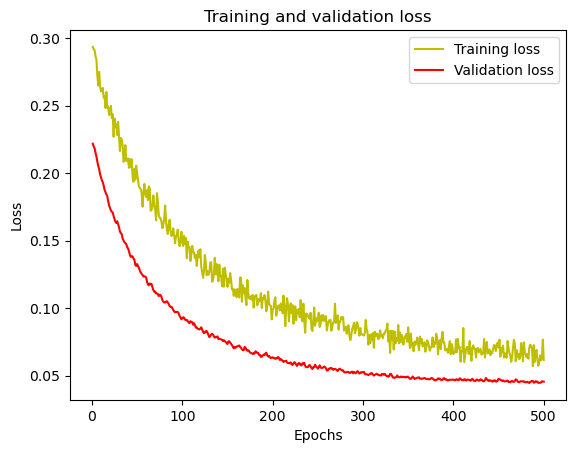

In [27]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


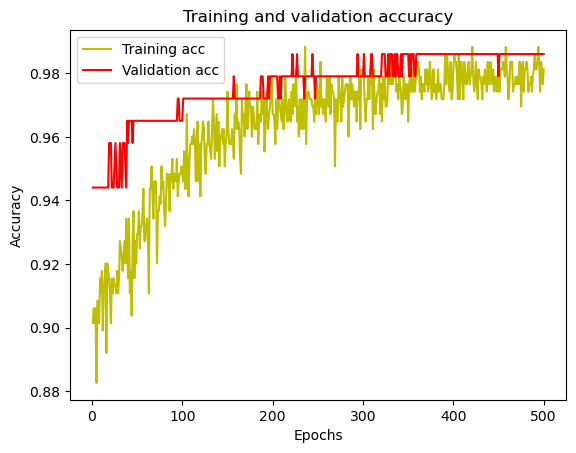

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


5/5 [==============================] - 0s 2ms/step


<Axes: >

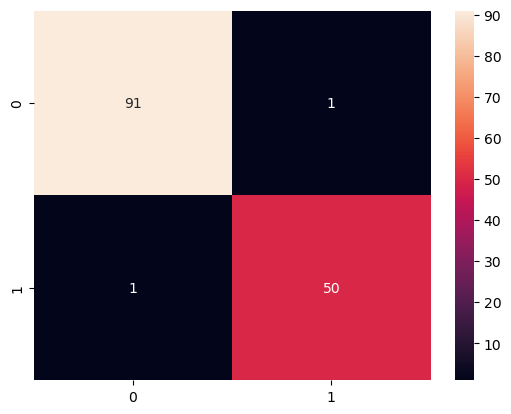

In [29]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)